In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

In [35]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [36]:
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [38]:
df_grouped = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalPrice': 'sum'
}).reset_index()

In [39]:
# Scaling features
features = ['Quantity', 'UnitPrice', 'TotalPrice']
scaler = StandardScaler()
X = scaler.fit_transform(df_grouped[features])

k_range = range(2, 11)
silhouette_scores = []
ch_scores = []
db_scores = []
dunn_scores = []

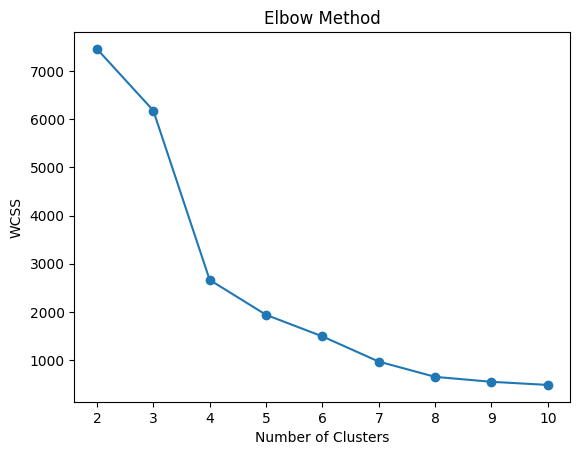

In [40]:
# === 1. Elbow Method ===
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Silhouette Score per K:
K=2: Silhouette Score = 0.9768
K=3: Silhouette Score = 0.9498
K=4: Silhouette Score = 0.9514
K=5: Silhouette Score = 0.9536
K=6: Silhouette Score = 0.9387
K=7: Silhouette Score = 0.9389
K=8: Silhouette Score = 0.7770
K=9: Silhouette Score = 0.6538
K=10: Silhouette Score = 0.6519


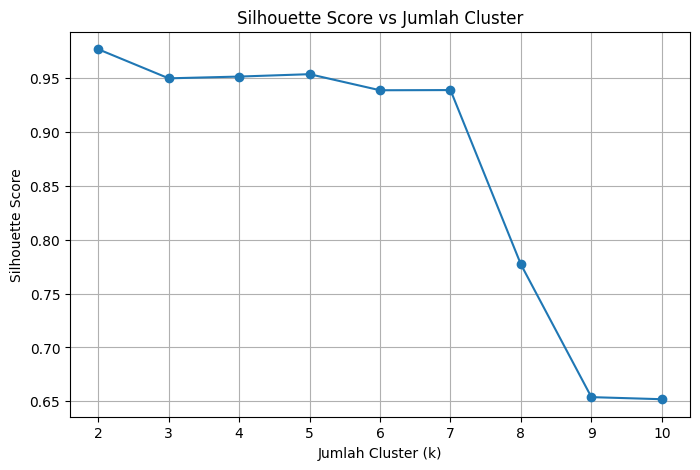

In [41]:
print("\nSilhouette Score per K:")
silhouette_scores = []  # Tambahkan ini untuk menyimpan skor

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    silhouette_scores.append(sil)  # Simpan skor ke dalam list
    print(f"K={k}: Silhouette Score = {sil:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Calinski-Harabasz Index per K:
K=2: CH Index = 3227.64
K=3: CH Index = 2396.56
K=4: CH Index = 5616.24
K=5: CH Index = 6190.98
K=6: CH Index = 6702.83
K=7: CH Index = 8998.50
K=8: CH Index = 11777.90
K=9: CH Index = 12346.03
K=10: CH Index = 12508.38


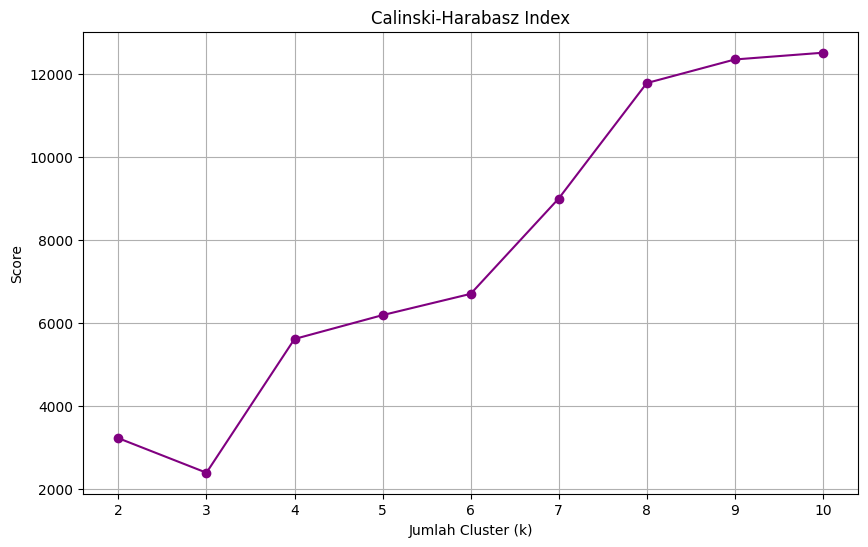

In [46]:
# === 3. Calinski-Harabasz Index ===
ch_scores = []

print("\nCalinski-Harabasz Index per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    ch = calinski_harabasz_score(X, labels)
    ch_scores.append(ch)
    print(f"K={k}: CH Index = {ch:.2f}")

# Plot dengan ukuran lebih besar
plt.figure(figsize=(10, 6))
plt.plot(k_range, ch_scores, marker='o', color='purple')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Davies-Bouldin Index per K:
K=2: DB Index = 0.4151
K=3: DB Index = 0.5684
K=4: DB Index = 0.4611
K=5: DB Index = 0.4489
K=6: DB Index = 0.5348
K=7: DB Index = 0.3895
K=8: DB Index = 0.4582
K=9: DB Index = 0.4905
K=10: DB Index = 0.5277


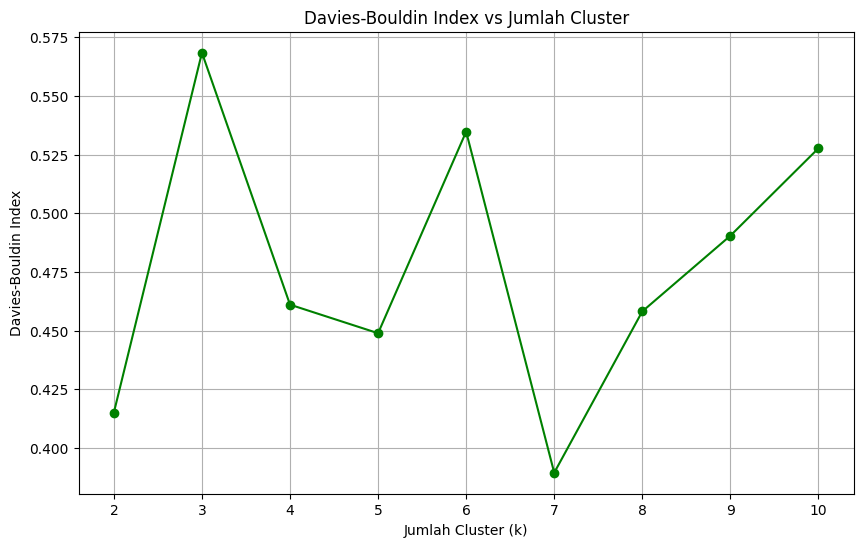

In [47]:
# === 4. Davies-Bouldin Index ===

db_scores = []  # Untuk menyimpan nilai DB Index

print("\nDavies-Bouldin Index per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    db = davies_bouldin_score(X, labels)
    db_scores.append(db)  # Simpan nilai
    print(f"K={k}: DB Index = {db:.4f}")

# Visualisasi dengan ukuran besar
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_scores, marker='o', color='green')
plt.title('Davies-Bouldin Index vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()


Dunn Index per K:
K=2: Dunn Index = 0.0412
K=3: Dunn Index = 0.0083
K=4: Dunn Index = 0.0169
K=5: Dunn Index = 0.0169
K=6: Dunn Index = 0.0115
K=7: Dunn Index = 0.0234
K=8: Dunn Index = 0.0011
K=9: Dunn Index = 0.0006
K=10: Dunn Index = 0.0006


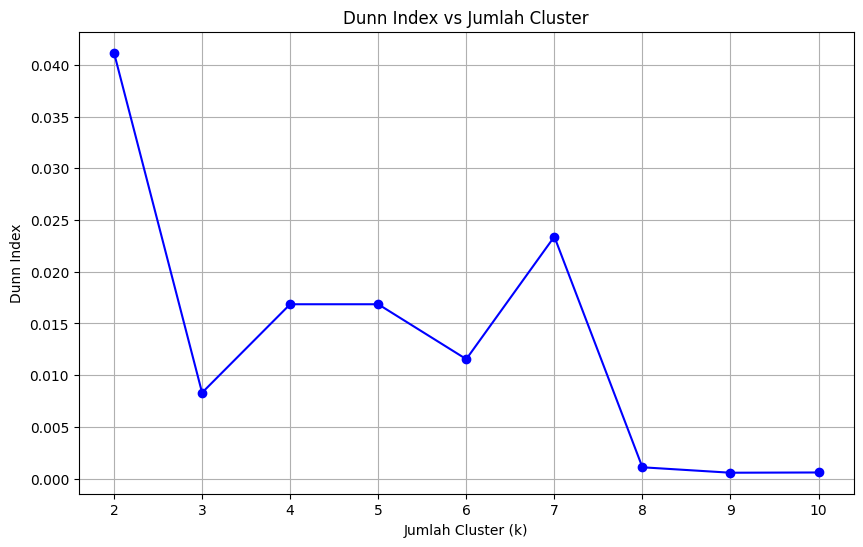

In [48]:
# === 5. Dunn Index ===
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)
    intra_dists = []
    inter_dists = []
    for i in unique_clusters:
        members = np.where(labels == i)[0]
        if len(members) > 1:
            intra = np.max(distances[np.ix_(members, members)])
        else:
            intra = 0
        intra_dists.append(intra)
        for j in unique_clusters:
            if i < j:
                between = np.min(distances[np.ix_(members, np.where(labels == j)[0])])
                inter_dists.append(between)
    return np.min(inter_dists) / np.max(intra_dists)

# Hitung dan simpan hasilnya
dunn_scores = []

print("\nDunn Index per K:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    dunn = dunn_index(X, labels)
    dunn_scores.append(dunn)
    print(f"K={k}: Dunn Index = {dunn:.4f}")

# Plot Dunn Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, dunn_scores, marker='o', color='blue')
plt.title('Dunn Index vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Dunn Index')
plt.grid(True)
plt.show()

In [26]:
# Visualisasi hasil clustering terbaik dari Silhouette Score
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df_grouped['Cluster'] = kmeans_labels

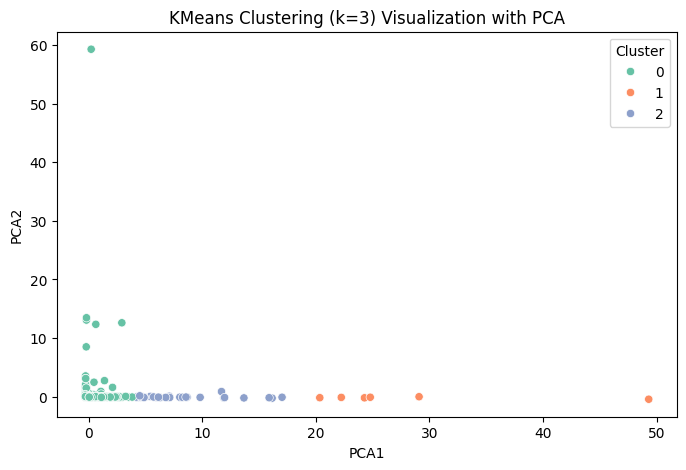

In [27]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_grouped['PCA1'] = X_pca[:, 0]
df_grouped['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_grouped, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f'KMeans Clustering (k={best_k}) Visualization with PCA')
plt.show()


In [28]:
# Penjelasan Metrik
print("\nPENJELASAN METRIK:")
print("1. Silhouette Score: Menilai kekompakan dan pemisahan antar cluster (semakin tinggi semakin baik).")
print("2. Calinski-Harabasz Index: Variansi antar cluster dibandingkan dalam cluster (semakin tinggi semakin baik).")
print("3. Davies-Bouldin Index: Rata-rata kesamaan antar cluster (semakin rendah semakin baik).")
print("4. Dunn Index: Jarak antar cluster minimum dibandingkan diameter cluster maksimum (semakin tinggi semakin baik).")


PENJELASAN METRIK:
1. Silhouette Score: Menilai kekompakan dan pemisahan antar cluster (semakin tinggi semakin baik).
2. Calinski-Harabasz Index: Variansi antar cluster dibandingkan dalam cluster (semakin tinggi semakin baik).
3. Davies-Bouldin Index: Rata-rata kesamaan antar cluster (semakin rendah semakin baik).
4. Dunn Index: Jarak antar cluster minimum dibandingkan diameter cluster maksimum (semakin tinggi semakin baik).


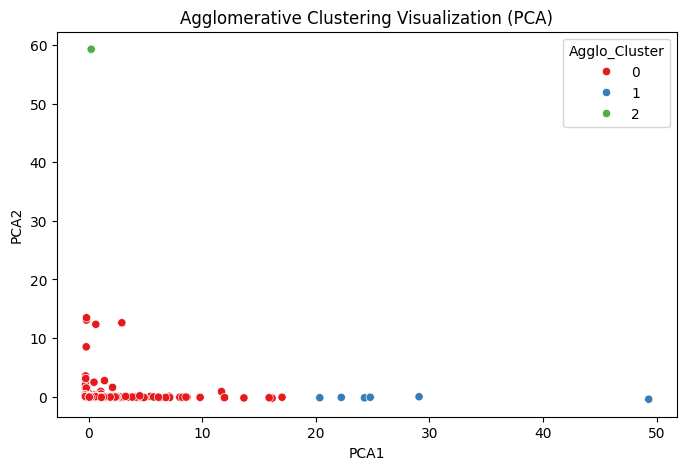

In [15]:
# Plot Agglomerative Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_grouped, x='PCA1', y='PCA2', hue='Agglo_Cluster', palette='Set1')
plt.title('Agglomerative Clustering Visualization (PCA)')
plt.show()